In [4]:
"""
	BT3051 Data Structures and Algorithms for Biology - 2022
	Name - Yogesh Agarwala
	Roll - EE19B130

	Assignment: 5
	Q3. Floyd-Warshall Algorithm
"""


import networkx as nx
import math

printed = False

def max_distance_of_any_node_from_a_source(G,source):
	global printed
	"""
	Given an connected undirected weighted networkx graph and a source node, find the shortest paths to all other nodes and return the largest among them.
	"""

	N = G.number_of_nodes()

	#---------------------------------- Floyd-Warshall algorithm -----------------------------------#
	# let dist be a |V| × |V| array of minimum distances initialized to ∞ (infinity)
	dist = [[math.inf for i in range(N+1)] for j in range(N+1)]   # Initialise the distance array
	# for each edge (u, v) in edge_list do dist[u][v] ← w(u, v)
	edge_list = list(G.edges(data="weight"))
	for edge in edge_list:
		u,v,w = map(int,edge)
		dist[u][v] = w
		dist[v][u] = w
	# for each vertex v do dist[v][v] ← 0
	for v in range(1,N+1):                                  
		dist[v][v] = 0
	# for rest of the edges (u,v)
	for k in range(1,N+1):
		for i in range(1,N+1):
			for j in range(1,N+1):
				if dist[i][j] > (dist[i][k] + dist[k][j]):
					dist[i][j] = dist[i][k] + dist[k][j]
	# where dist[u][] stores the shortest path from a given node u to all other nodes

	#-------------------- shortest paths from source node to all other nodes -----------------------#
	shortest_paths = [0]*(N+1) 
	for v in range(1,N+1):
		shortest_paths[v] = dist[source][v]

	#----------------------------- longest among these shortest paths ------------------------------#
	max_distance = 0
	for i in range(1,N+1):
		max_distance = max(max_distance, shortest_paths[i])

	if not printed:
		print(dist)
		printed = True
	return max_distance


def critical_node(G):
	"""
	Given an connected undirected weighted networkx graph, return the node that has the shortest longest path. 
	"""
	N = G.number_of_nodes()
	critical_node = 0
	min_long_short_path = math.inf

	for v in range(1,N+1):
		# longest among the shortest paths from source node v
		long_short_path = max_distance_of_any_node_from_a_source(G,v)
		print(long_short_path)
		if(long_short_path < min_long_short_path):
			min_long_short_path = long_short_path
			critical_node = v

	return critical_node


if __name__ == '__main__':
	g = nx.Graph()
	#Generate the graph from the edge list provided
	with open('q3.edgelist') as f:
		edge_list = f.readlines()
		for edge in edge_list:
			u,v,w = edge.rstrip().split(" ")
			g.add_edge(u,v,weight=int(w))

	print(critical_node(g))

[[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf], [inf, 0, 70, 20, 160, 110, 240, 50, 40, 370, 240, 230, 280, 320, 190, 310, 540], [inf, 70, 0, 90, 90, 40, 170, 120, 110, 300, 170, 160, 210, 250, 260, 380, 470], [inf, 20, 90, 0, 180, 130, 260, 30, 20, 390, 260, 250, 300, 340, 170, 290, 560], [inf, 160, 90, 180, 0, 130, 260, 210, 200, 210, 260, 250, 300, 340, 350, 470, 380], [inf, 110, 40, 130, 130, 0, 210, 160, 150, 340, 130, 120, 250, 290, 300, 420, 510], [inf, 240, 170, 260, 260, 210, 0, 290, 280, 470, 340, 330, 40, 80, 430, 550, 640], [inf, 50, 120, 30, 210, 160, 290, 0, 50, 420, 290, 280, 330, 370, 140, 320, 590], [inf, 40, 110, 20, 200, 150, 280, 50, 0, 410, 280, 270, 320, 360, 190, 270, 580], [inf, 370, 300, 390, 210, 340, 470, 420, 410, 0, 470, 460, 510, 550, 560, 680, 170], [inf, 240, 170, 260, 260, 130, 340, 290, 280, 470, 0, 250, 380, 420, 430, 550, 640], [inf, 230, 160, 250, 250, 120, 330, 280, 270, 460, 250, 0, 370, 410, 420, 540, 630],

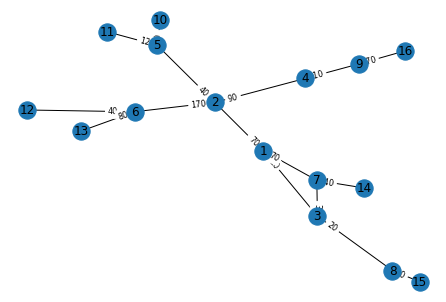

In [2]:
import matplotlib.pyplot as plt
edge_labels = dict([((u,v,),d['weight']) for u,v,d in g.edges(data=True)])
pos = nx.spring_layout(g)

nx.draw(g,pos,with_labels=True,connectionstyle='arc3,rad=0.1')
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels,font_size=8,label_pos=0.8)
plt.show()

In [ ]:
0, 70, 20, 160, 110, 240, 50, 40, 370, 240, 230, 280, 320, 190, 310, 540,      540
70, 0, 90, 90, 40, 170, 120, 110, 300, 170, 160, 210, 250, 260, 380, 470,       470
20, 90, 0, 180, 130, 260, 30, 20, 390, 260, 250, 300, 340, 170, 290, 560,       560
160, 90, 180, 0, 130, 260, 210, 200, 210, 260, 250, 300, 340, 350, 470, 380,    470
110, 40, 130, 130, 0, 210, 160, 150, 340, 130, 120, 250, 290, 300, 420, 510,   510
240, 170, 260, 260, 210, 0, 290, 280, 470, 340, 330, 40, 80, 430, 550, 640,     640 
50, 120, 30, 210, 160, 290, 0, 50, 420, 290, 280, 330, 370, 140, 320, 590,      590
40, 110, 20, 200, 150, 280, 50, 0, 410, 280, 270, 320, 360, 190, 270, 580, 
370, 300, 390, 210, 340, 470, 420, 410, 0, 470, 460, 510, 550, 560, 680, 170, 
240, 170, 260, 260, 130, 340, 290, 280, 470, 0, 250, 380, 420, 430, 550, 640, 
230, 160, 250, 250, 120, 330, 280, 270, 460, 250, 0, 370, 410, 420, 540, 630, 
280, 210, 300, 300, 250, 40, 330, 320, 510, 380, 370, 0, 120, 470, 590, 680, 
320, 250, 340, 340, 290, 80, 370, 360, 550, 420, 410, 120, 0, 510, 630, 720, 
190, 260, 170, 350, 300, 430, 140, 190, 560, 430, 420, 470, 510, 0, 460, 730, 
310, 380, 290, 470, 420, 550, 320, 270, 680, 550, 540, 590, 630, 460, 0, 850, 
540, 470, 560, 380, 510, 640, 590, 580, 170, 640, 630, 680, 720, 730, 850, 0, 
